###Machine learning cơ bản

**Gradient Descent cho hàm 1 biến**

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

VD: *f*(x) = 1/2*x^2 + 5sin(x)

In [ ]:
def grad(x):
  return x + 5*np.cos(x)

def cost(x):
  return 1/2*x**2 + 5*np.sin(x)

def grad2(x):
  return 1 - 5*np.sin(x)

def myGD1(eta, x0):
  x = [x0]
  for it in range(1000):
    x_new = x[-1] - eta * grad(x[-1])
    if abs(grad(x_new)) < 1e-3:
      break
    x.append(x_new)
  return (x, it)

  # Công thức Newton-Raphson
def myGD2(x0):
  x = [x0]
  for it in range(1000):
    x_new = x[-1] - grad(x[-1]) / grad2(x[-1])
    if abs(x_new - x[-1]) < 1e-3:
      break
    x.append(x_new)
  return (x, it)

In [ ]:
(x1, it1) = myGD1(.01, -2)
(x2, it2) = myGD1(.1, 2)
(x3, it3) = myGD1(.01, 1.5)

(x4, it4) = myGD2(4)
(x5, it5) = myGD2(3)
(x6, it6) = myGD2(1)
(x7, it7) = myGD2(-4)
print('Solution x1 = %f, cost = %f, obtained after %d iterations'%(x1[-1], cost(x1[-1]), it1))
print('Solution x2 = %f, cost = %f, obtained after %d iterations'%(x2[-1], cost(x2[-1]), it2))
print('Solution x3 = %f, cost = %f, obtained after %d iterations'%(x3[-1], cost(x3[-1]), it3))
print()
print("Solution x4 = %f, cost = %f, obtained after %d iterations"%(x4[-1], cost(x4[-1]), it4))
print("Solution x5 = %f, cost = %f, obtained after %d iterations"%(x5[-1], cost(x5[-1]), it5))
print("Solution x6 = %f, cost = %f, obtained after %d iterations"%(x6[-1], cost(x6[-1]), it6))
print("Solution x7 = %f, cost = %f, obtained after %d iterations"%(x7[-1], cost(x7[-1]), it7))

Solution x1 = -1.306618, cost = -3.972912, obtained after 137 iterations
Solution x2 = 3.837196, cost = 4.157793, obtained after 30 iterations
Solution x3 = -1.306260, cost = -3.972912, obtained after 194 iterations

Solution x4 = 3.837508, cost = 4.157793, obtained after 2 iterations
Solution x5 = -11.727416, cost = 72.485867, obtained after 999 iterations
Solution x6 = 1.977342, cost = 6.547402, obtained after 3 iterations
Solution x7 = 1.977317, cost = 6.547402, obtained after 17 iterations


**Gradient Descent cho hàm nhiều biến**

Trong bài toán linear regression, ta tối ưu hàm loss như sau:

In [ ]:
import numpy as np
import  matplotlib
import matplotlib.pyplot as plt
np.random.seed(2)

Solution found by formula: w =  [[4.0071715  2.98225924]]


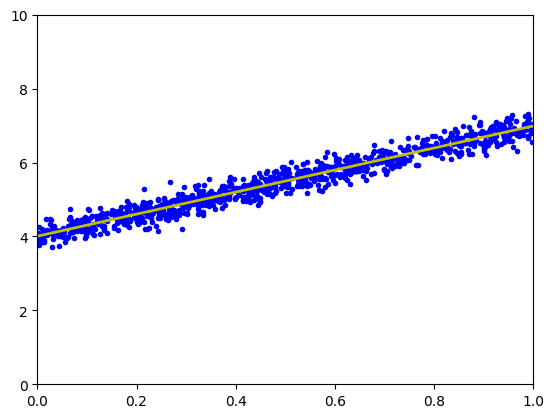

In [ ]:
X = np.random.rand(1000, 1)
y = 4 + 3*X + .2*np.random.randn(1000, 1) # noise added

# Building Xbar
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)

A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w_lr = np.dot(np.linalg.pinv(A), b)
print('Solution found by formula: w = ',w_lr.T)

# Display result
w = w_lr
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(0, 1, 2, endpoint=True)
y0 = w_0 + w_1*x0

# Draw the fitting line
plt.plot(X.T, y.T, 'b.')     # data
plt.plot(x0, y0, 'y', linewidth = 2)   # the fitting line
plt.axis([0, 1, 0, 10])
plt.show()

Đường thẳng tìm được có phương trình y ~ 4 + 2.998x

Ta viết đạo hàm và hàm mất mát

In [ ]:
def grad(w):
  N = Xbar.shape[0]
  return 1/N * Xbar.T.dot(Xbar.dot(w) - y)

def cost(w):
    N = Xbar.shape[0]
    return .5/N*np.linalg.norm(y - Xbar.dot(w), 2)**2;

In [ ]:
def numerical_grad(w, cost):
    eps = 1e-4
    g = np.zeros_like(w)
    for i in range(len(w)):
        w_p = w.copy()
        w_n = w.copy()
        w_p[i] += eps
        w_n[i] -= eps
        g[i] = (cost(w_p) - cost(w_n))/(2*eps)
    return g
# Hàm này dùng để kiểm tra xem đạo hàm tính tay có đúng không
# Nếu hàm là một ma trận, thì chúng ta thay đổi một chút trong numerical_grad
def check_grad(w, cost, grad):
    w = np.random.rand(w.shape[0], w.shape[1])
    grad1 = grad(w)
    grad2 = numerical_grad(w, cost)
    return True if np.linalg.norm(grad1 - grad2) < 1e-6 else False

print( 'Checking gradient...', check_grad(np.random.rand(2, 1), cost, grad))

Checking gradient... True


In [ ]:
def myGD(w_init, grad, eta):
    w = [w_init]
    for it in range(100):
        w_new = w[-1] - eta*grad(w[-1])
        if np.linalg.norm(grad(w_new))/len(w_new) < 1e-3:
            break
        w.append(w_new)
    return (w, it)

w_init = np.array([[2], [1]])
(w1, it1) = myGD(w_init, grad, 1)
print('Solution found by GD: w = ', w1[-1].T, ',\nafter %d iterations.' %(it1+1))

Solution found by GD: w =  [[4.02199496 2.95380036]] ,
after 50 iterations.


**Gradient Descent với Momentum (GDm)**

In [ ]:
# check convergence
def has_converged(theta_new, grad):
    return abs(np.linalg.norm(grad(theta_new))) < 1e-3

def GD_momentum(theta_init, grad, eta, gamma):
    # Suppose we want to store history of theta
    theta = [theta_init]
    v_old = np.zeros_like(theta_init)
    for it in range(1000):
        v_new = gamma*v_old + eta*grad(theta[-1])
        theta_new = theta[-1] - v_new
        if has_converged(theta_new, grad):
            break
        theta.append(theta_new)
        v_old = v_new
    return (theta, it)
    # this variable includes all points in the path
    # if you just want the final answer,
    # use `return theta[-1]`

In [ ]:
def grad(x):
  return x + 5*np.cos(x)

def cost(x):
  return 1/2*x**2 + 5*np.sin(x)

In [ ]:
(X1, IT1) = GD_momentum(0, grad, 0.01, 0.9)
print("Solution X = %f, cost = %f, obtained after %d iterations"%(X1[-1], cost(X1[-1]), IT1))
(X2, IT2) = GD_momentum(10, grad, 0.01, 0.9)
print("Solution X = %f, cost = %f, obtained after %d iterations"%(X2[-1], cost(X2[-1]), IT2))

Solution X = -1.302999, cost = -3.972877, obtained after 85 iterations
Solution X = -1.307264, cost = -3.972910, obtained after 148 iterations


**Nesterov accelerated gradient (NAG)**

In [ ]:
def stop_point(theta_new, grad):
  return np.linalg.norm(grad(theta_new)) < 1e-3

def NAG(theta_init, grad, eta, gamma):
  theta = [theta_init]
  v_old = np.zeros_like(1)
  for it in range(1000):
    v_new = gamma*v_old + eta*grad(theta[-1] - gamma*v_old)
    theta_new = theta[-1] -  gamma*v_old
    if stop_point(theta_new, grad):
      break
    v_old = v_new
    theta.append(theta_new)
  return (theta, it)

In [ ]:
# This case NAG is slower than GDm
(X3, IT3) = NAG(0, grad, 0.01, 0.9)
print("Solution X = %f, cost = %f, obtained after %d iterations"%(X3[-1], cost(X3[-1]), IT3))
(X4, IT4) = NAG(10, grad, 0.01, 0.9)
print("Solution X = %f, cost = %f, obtained after %d iterations"%(X4[-1], cost(X4[-1]), IT4))

Solution X = -1.303962, cost = -3.972894, obtained after 91 iterations
Solution X = -1.306888, cost = -3.972911, obtained after 159 iterations


**Các thuật toán khác**
- Deep Learning: Adagrad, Adam, RMSprop, ...


**Biến thể của Gradient Descent**

- Batch Gradient Descent: VD: trong bài toán tối ưu hàm loss của linear regression thì xem theta = w
- Stochastic Gradient Descent (SGD):
  + Một epoch là mỗi lần duyệt qua tất cả các điểm trên toàn bộ dữ liệu
  + Với GD thông thường thì mỗi epoch tương ứng với 1 lần cập nhật theta; với SGD thì mỗi epoch ứng với N lần cập nhật theta với N là số điểm dữ liệu.  
  + Bằng cách giảm đi tốc độ thực hiện 1 epoch, SGD chỉ yêu cầu một lượng epoch rất nhỏ (sau đó có dữ liệu mới thì chỉ cần chạy dưới một epoch là đã có nghiệm tốt)
=> SGD phù hợp với các bài toán có lượng cơ sở dữ liệu lớn (chủ yếu là Deep Learning) và các bài toán yêu cầu mô hình thay đổi liên tục, tức là online learning.
  + **Thứ tự chọn điểm dữ liệu**: Chú ý: sau mỗi epoch, chúng ta cần shuffle (xáo trộn) thứ tự của các dư liệu để đảm bảo tính ngẫu nhiêu (ảnh hướng đến hiệu năng của SGD)
  + **Quy tắc cập nhật**:
  theta = theta - eta*nabla(J(theta, x_i, y_i), theta)
  trong đó, J(theta, x_i, y_i) là hàm mất mát với chỉ 1 cặp điểm dữ liệu (input, label) là (x_i, y_i). Chú ý: có thể áp dụng các thuật toán GDm, Adagrad, ... vào SGD




  


  **Ví dụ với bài toán Linear Regression**

In [ ]:
# single point gradient
def sgrad(w, i, rd_id):
    true_i = rd_id[i]
    xi = Xbar[true_i, :]
    yi = y[true_i]
    a = np.dot(xi, w) - yi
    return (xi*a).reshape(2, 1)

def SGD(w_init, grad, eta):
    w = [w_init]
    w_last_check = w_init
    iter_check_w = 10
    N = X.shape[0]
    count = 0
    for it in range(10):
        # shuffle data
        rd_id = np.random.permutation(N)
        for i in range(N):
            count += 1
            g = sgrad(w[-1], i, rd_id)
            w_new = w[-1] - eta*g
            w.append(w_new)
            if count%iter_check_w == 0:
                w_this_check = w_new
                if np.linalg.norm(w_this_check - w_last_check)/len(w_init) < 1e-3:
                    return w
                w_last_check = w_this_check
    return w

- Mini-batch Gradient Descent:
  + Sử dụng n > 1 điểm dữ liệu (nhưng vẫn nhỏ hơn tổng số dữ liệu N rất nhiều), mỗi mini-batch có n điểm dữ liệu (trừ batch cuối nếu N%n!= 0).
  + Mỗi lần cập nhật, thuật toán lấy ra một mini-batch để tính toán đạo hàm rồi cập nhật.
  + Công thức có thể viết dưới dạng:
  theta = theta - eta*nabla(J(theta, x_i:i+n, y_i:i+n), theta)
  trong đó, x_i:i+n được hiểu là dữ liệu từ thứ i -> i+n-1
  + Các thuật toán khác cho GD như GDm, Adagrad, Adadelta, ... cũng có thể được áp dụng.
  + Thường sử dụng trong hầu hết các thuật toán ML, đặt biệt là trong DL, với n từ 50 đến 100.
  

- Stopping Criteria (điều kiện dừng)
~ Khi nào thuật toán đã hội tụ và dừng lại?
Trong thực nghiệm, có một vài phương pháp sau:
  + Giới hạn số vòng lặp: đảm bảo chương trình chạy không quá lâu. Nhược điểm: thuật toán dừng lại trước khi đủ gần với nghiệm.
  + So sánh Gradient của nghiệm tại hai lần liên tiếp, khi đủ nhỏ thì dừng lại. Nhược điểm: việc tính đạo hàm đôi khi trở nên quá phức tạp (trong TH có quá nhiều dữ liệu, ...), nếu sử dụng pp này thì coi như không được lợi khi sử dụng SGD và mini-batch GD
  + So sánh giá trị hàm mất mát của nghiệm tại hai lần cập nhật liên tiếp, khi đủ nhỏ thì dừng lại. Nhược điểm: tại một thòi điểm, đths có dạng bằng phẳng tại một khu vực nhưng khu vực đó không chứa điểm local minimum (khu vực này thường được gọi là saddle points), thuật toán cũng dừng lại trước khi đạt giá trị mong muốn.
  + Trong SGD và mini-batch GD, so sánh nghiệm sau một vài lần cập nhật. Đoạn code ở trên về SGD, việc so sánh bắt đầu mỗi khi nghiệm được cập nhật 10 lần.

- Newton's method:
    + Trong không gian 1 biến: x_t+1 = x_t - f'(x_t)/f''(x_t)
    + Trong không gian nhiều chiều với theta là biến thì: theta = theta - H(J(theta))^(-1)*nabla(J(theta), theta), trong đó H(J(theta)) là đạo hàm bậc hai của hàm mất mát (Hessian matrix) và H(J(theta))^-1 là ma trận nghịch đảo (hoặc ma trận giả nghịch đảo của ma trận đó).
    + Hạn chế:
      + Điểm khởi tạo phải rất gần với nghiệm  x (dựa trên khai triển Taylor)
      + Trong việc giải phương trình f(x) = 0, xuất hiện đạo hàm ở mẫu số. Khi đạo hàm này gần bằng với 0, ta sẽ được một đường thẳng // hoặc gần // với trục hoành. Ta sẽ hoặc không tìm được giao điểm, hoặc được một giao điểm ở vô cùng. Đặc biệt, khi nghiệm chính là điểm có đạo hàm bằng 0, thuật toán xảy ra lỗi, không tìm được nghiệm
      + Khi áp dụng Newton's method cho bài toán tối ưu trong không gian nhiều chiều, chúng ta cần tính nghịch đảo của Hessian matrix. Số chiều càng lớn, độ phức tạp càng lớn.

### Tek4k

**Bài toán**: Tìm min & max của một hàm số, chúng ta thường thực hiện giải phương trình với đạo hàm bằng 0, đối với những hàm số phức tạp thì việc giải phương trình đạo hàm bằng 0 gần như không thể. Khi đó, có một phương pháp để giải quyết bài toán là Gradient Descent.

Xét hàm số f(x+x_o) khi thực hiện khai triển Taylor hàm số này ta được:
  
  * f(x+x_o) = f(x) + x_o*f'(x) + o(x_o)^2 (1)

với o(x_o)^2 là sai số khi xấp xỉ Taylor cấp 2

Từ (1) nếu x_o thay đổi một lượng nghịch đảo với đạo hàm tại x_o thig f(x) sẽ giảm giá trị.

Đặt x_o = η*f'(x) (η > 0)

Khi đó ta có:
    
  * f(x - η*f'(x)) = f(x) - η*(f'(x))^2 + o((η*f'(x))^2) (2)<= f(x)

Từ đó, ta có giá trị mới của x là x = x - ηf'(x) (3). Vậy ta đã có được công thưc thay đổi giá trị của x sao cho  khi thay đổi  số f(x) luôn giảm giá trị.


Ở đây xuất hiện hai câu hỏi:

-  Thứ nhất là tại sao ta lại đặt x_o = -η*f'(x), ta có thể đặt x_o bằng giá trị khác được không?
-  Thứ hai là số η ở đây là gì và nó ảnh hưởng như nào đến tốc độ tim ra giá trị trị x sao cho hàm số f(x) tiệm cận giá trị nhỏ nhất.

Với câu hỏi đầu tiên, ta có thể chọn giá  x_o bất kì nhưng phải đảm bảm là sau khi giảm thay đổi x_o thì f(x) phải luôn giảm. Để làm rõ câu hỏi thứ hai ta sẽ xem ở bài sau, khi đó ta sẽ biết η còn được gọi là tốc độ học hay learning rate, đây là một hyparameter trong các thuật toán học máy và học sâu.


**Cài đặt thuật toán Gradient Descent**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = np.random.rand(500, 2)

**Batch Gradient Descent**
Batch Gradient Descent là kỹ thuật mỗi lần cập nhật weight sẽ sử dụng trung bình đạo hàm của toàn bộ dữ liệu.

Hàm loss **MSE**:

In [ ]:
def loss_function(data,theta):
    #get m and b
    m = theta[0]
    b = theta[1]
    loss = 0
    #on each data point
    for i in range(0, len(data)):
        #get x and y
        x = data[i, 0]
        y = data[i, 1]
        #predict the value of y
        y_hat = (m*x + b)
        #compute loss as given in quation (2)
        loss = loss + ((y - (y_hat)) ** 2)
    #mean sqaured loss
    mean_squared_loss = loss / float(len(data))
    return mean_squared_loss

**Xây dựng công thức tính đạo hàm**

Công thức đạo hàm hàm loss theo m sao cho một điểm dữ liệu sẽ là: 2*x*(y-(m*x + b))

Công thức đạo hàm hàm loss theo b cho một điểm dữ liệu sẽ là 2*(y - (m*x+b))

Trong đó, m và b là các trọng số cần tìm để tối thiểu hàm loss

In [ ]:
def compute_gradients(data, theta):
    gradients = np.zeros(2)
    #total number of data points
    N = float(len(data))
    m = theta[0]
    b = theta[1]
    #for each data point
    for i in range(len(data)):
        x = data[i, 0]
        y = data[i, 1]
        #gradient of loss function with respect to m as given in (3)
        gradients[0] += - (2 / N) * x * (y - (( m* x) + b))
        #gradient of loss funcction with respect to b as given in (4)
        gradients[1] += - (2 / N) * (y - ((theta[0] * x) + b))
    #add epsilon to avoid division by zero error
    epsilon = 1e-6
    gradients = np.divide(gradients, N + epsilon)
    return gradients

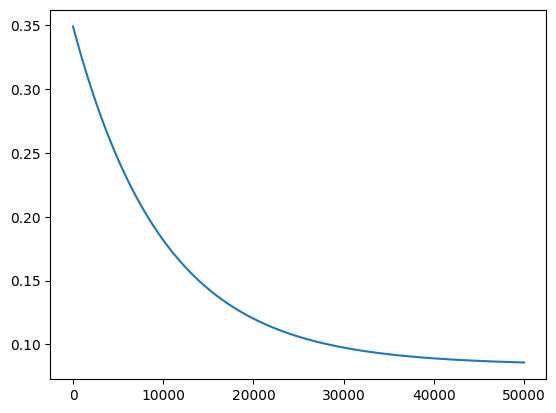

In [ ]:
theta = np.zeros(2)
gr_loss=[]
for t in range(50000):
    #compute gradients
    gradients = compute_gradients(data, theta)
    #update parameter
    theta = theta - (1e-2*gradients)
    #store the loss
    gr_loss.append(loss_function(data,theta))
plt.plot(gr_loss)